<a href="https://colab.research.google.com/github/sakunisgithub/machine_learning/blob/master/0016_RL__10_armed_Testbed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We consider the following testbed to roughly assess the relative effectiveness of the greedy and $\epsilon-$greedy action-value methods by comparing them numerically on a suite of test problems. The setup is motivated from the book by Sutton and Barto.

Consider a set of $2000$ randomly generated $10-$armed bandit problems.

$\bullet$ For each bandit problem, the action values, $q_*(a)$, $a = 1, 2, \ldots, 10$ were selected according to a Gaussian distribution with zero mean and unit variance.

$\bullet$ When a learning method applied to a problem selected action $A_t$ at time step $t$, the actual reward, $R_t$, was selected from a Gaussian distribution with mean $q_*(A_t)$ and unit variance.


This suite of test tasks is the $\textit{10-armed testbed}$.

For the two learning methods concerned, we measure their performance and behaviour as they improve with experience over $1000$ time steps when applied to one of $2000$ bandit problems. This makes up one $\textit{run}$.

We repeat this for $2000$ independent runs, each with a different bandit problem and obtain measures of the learning algorithm's average behaviour.

Both the methods formed their action-value estimates using the sample-average technique.

# Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
np.random.seed(22)

# Reward Function

In [3]:
def reward(action : int) :
  R = np.random.normal(loc=true_value[action], scale=1)
  return R

# Total Runs and Steps per run

In [4]:
total_runs = 2000; steps = 1000

# Greedy Action Selection

In [5]:
def greedy_run(steps : int) :

  greedy_history = np.empty((steps, 4))

  Q = np.zeros(10)
  N = np.zeros(10)

  optimal_action = np.argmax(true_value)

  for step in range(1, steps+1) :
    action = np.random.choice(np.flatnonzero(Q == Q.max()))
    N[action] += 1
    R = reward(action)

    Q[action] += (R - Q[action]) / N[action]

    greedy_history[step-1, :] = [step, action, R, int(action == optimal_action)]

  return greedy_history

In [6]:
greedy_history_all_runs = np.empty((total_runs, steps, 4))

In [7]:
for run in range(total_runs) :
  true_value = np.random.normal(loc=0, scale=1, size=10)
  greedy_history_all_runs[run, :, :] = greedy_run(steps=steps)

# $\epsilon-$greedy Action Selection

In [8]:
def epsilon_greedy_run(steps : int, epsilon : float) :

  epsilon_greedy_history = np.empty((steps, 4))

  Q = np.zeros(10)
  N = np.zeros(10)

  optimal_action = np.argmax(true_value)

  for step in range(1, steps+1) :
    u = np.random.rand()

    if u <= epsilon :
      action = np.random.choice(range(10))
    else :
      action = np.random.choice(np.flatnonzero(Q == Q.max()))

    N[action] += 1
    R = reward(action)

    Q[action] += (R - Q[action]) / N[action]

    epsilon_greedy_history[step-1, :] = [step, action, R, int(action == optimal_action)]

  return epsilon_greedy_history

## $\epsilon = 0.01$

In [9]:
epsilon_greedy_history_all_runs_1 = np.empty((total_runs, steps, 4))

In [10]:
for run in range(total_runs) :
  true_value = np.random.normal(loc=0, scale=1, size=10)
  epsilon_greedy_history_all_runs_1[run, :, :] = epsilon_greedy_run(steps=steps, epsilon=0.01)

## $\epsilon = 0.1$

In [11]:
epsilon_greedy_history_all_runs_2 = np.empty((total_runs, steps, 4))

In [12]:
for run in range(total_runs) :
  true_value = np.random.normal(loc=0, scale=1, size=10)
  epsilon_greedy_history_all_runs_2[run, :, :] = epsilon_greedy_run(steps=steps, epsilon=0.1)

# Comparison by Average Reward

Here we compare the rewards gained by the different methods at each of the $1000$ steps of a run; rewards were averaged over $2000$ independent runs.

In [13]:
average_reward = pd.DataFrame(columns=["greedy", "ep=0.01", "ep=0.1"])

In [14]:
average_reward["greedy"] = np.mean(greedy_history_all_runs[:, :, 2], axis=0)
average_reward["ep=0.01"] = np.mean(epsilon_greedy_history_all_runs_1[:, :, 2], axis=0)
average_reward["ep=0.1"] = np.mean(epsilon_greedy_history_all_runs_2[:, :, 2], axis=0)

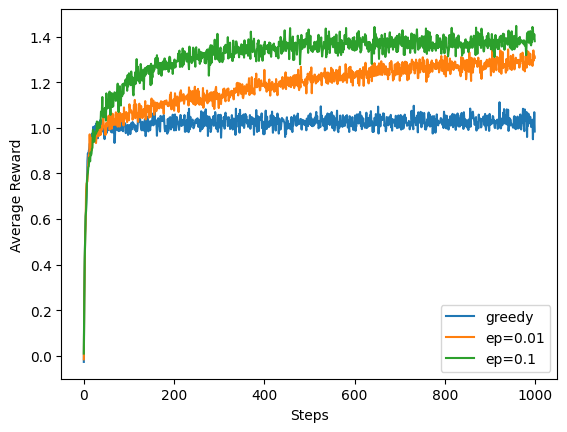

In [15]:
average_reward[["greedy", "ep=0.01", "ep=0.1"]].plot()
plt.xlabel("Steps")
plt.ylabel("Average Reward")

plt.show()

$\bullet$ There is increase in expected reward with experience.

$\bullet$ The greedy method improved slightly faster than the other methods at the very beginning, but then leveled off at a lower level. It acheived a reward-per-step of only $\approx 1$, compared with the best possible of $\approx 1.4$ on this testbed.

$\bullet$ More importantly, **the greedy method performed significantly worse in the long run because it often got stuck performing suboptimal actions**.

# Comparison by Percentage Optimal Action

Each of the $2000$ independent runs has an optimal action. For any action selection method, given step $t$, here we evaluate, in what percentage of runs out of all $2000$ runs the action selection method has selected the optimal action at step $t$.

In [16]:
percentage_optimal_action = pd.DataFrame(columns=["greedy", "ep=0.01", "ep=0.1"])

In [17]:
percentage_optimal_action["greedy"] = np.mean(greedy_history_all_runs[:, :, 3], axis=0) * 100
percentage_optimal_action["ep=0.01"] = np.mean(epsilon_greedy_history_all_runs_1[:, :, 3], axis=0) * 100
percentage_optimal_action["ep=0.1"] = np.mean(epsilon_greedy_history_all_runs_2[:, :, 3], axis=0) * 100

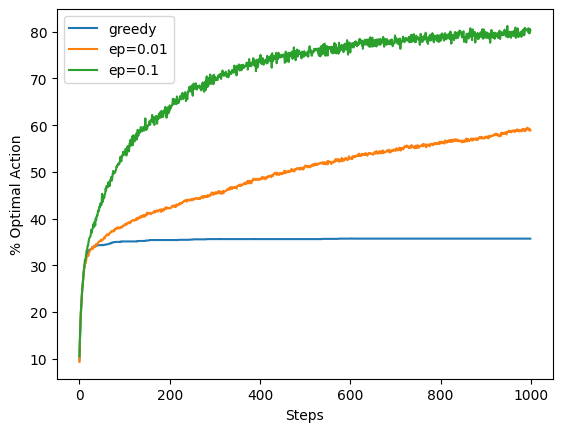

In [18]:
percentage_optimal_action[["greedy", "ep=0.01", "ep=0.1"]].plot()
plt.xlabel("Steps")
plt.ylabel("% Optimal Action")

plt.show()

$\bullet$ The greedy method found the optimal action in only approximately $33\%$ of the runs/tasks.

$\bullet$ The $\epsilon-$greedy methods eventually performed better because they continued to explore and to improve their chances of recognizing the optimal action.

$\bullet$ The $\epsilon = 0.1$ method explored more, and usually found the optimal action earlier, but it never selected that action more than $80\%$ of the times.

**The $\epsilon = 0.01$ method improved more slowly, but eventually would perform better than the $\epsilon = 0.1$ method on both performance measures shown above.**